# **UBC Hackathon Learning Analytics 2022**

In [18]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
# Read data
nav_events_data = pd.read_csv('../data/navigation_events.csv')

discussions_data = pd.read_csv('../data/additional/discussions.csv')
gradebook_data = pd.read_csv('../data/additional/gradebook.csv')

### **Begin Boogaloo Code:**

##### *Clean up discussions data*

In [20]:
# discussions_data.dtypes.value_counts()
# display(discussions_data.head())

# select only the columns we need
select_discussion = discussions_data[["actor_id", "membership_role", "post_message_length", "count_of_likes"]]
# display(select_discussion)

# keep only rows where membership_role is "["Learner"]" in the select_discussion dataframe
flt_discussion = select_discussion[select_discussion["membership_role"] == '["Learner"]']
display(flt_discussion)

,actor_id,membership_role,post_message_length,count_of_likes
2,LEARNER_3,"[""Learner""]",564,0
3,LEARNER_11,"[""Learner""]",174,0
4,LEARNER_3,"[""Learner""]",226,0
6,LEARNER_10,"[""Learner""]",408,0
7,LEARNER_37,"[""Learner""]",1409,0
...,...,...,...,...
1604,LEARNER_13,"[""Learner""]",595,0
1605,LEARNER_31,"[""Learner""]",316,0
1606,LEARNER_19,"[""Learner""]",1100,0
1608,LEARNER_14,"[""Learner""]",611,0


##### *Clean up gradebook data*

In [21]:
# display(gradebook_data.head())

# select only the columns we need
select_gradebook = gradebook_data[["Student", "Participation & engagement Current Score", "Current Score"]]

# remove NaN values
filter_gradebook = select_gradebook.dropna().iloc[1:].sort_values(by="Current Score", ascending=True)
                    
display(filter_gradebook)

,Student,Participation & engagement Current Score,Current Score
15,LEARNER_17,40,65.7
35,LEARNER_18,55,69.7
12,LEARNER_20,55,69.7
10,LEARNER_36,60,70.9
30,LEARNER_33,40,72.1
31,LEARNER_27,50,73
8,LEARNER_15,60,76.2
24,LEARNER_31,70,77.9
7,LEARNER_30,70,78.3
3,LEARNER_10,85,78.4


### **Plotting The Data:**
We plot the data, 'nuff said

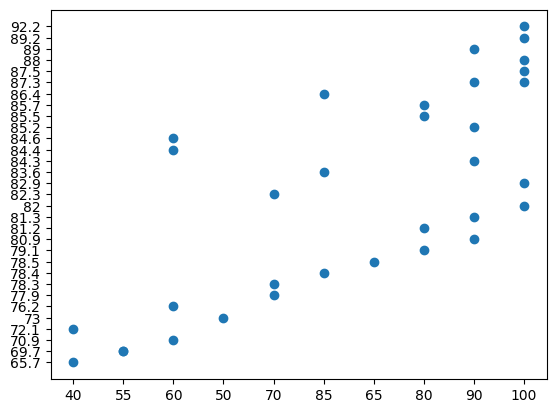

In [22]:
# create scatter plot for current score and participation & engagement current score
plt.scatter(filter_gradebook["Participation & engagement Current Score"], filter_gradebook["Current Score"])

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>],
       [<AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>],
       [<AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '7'}>]], dtype=object)

0.025551023311775993


count_of_likes
0    1072.201662
1    1098.388186
2    1144.600000
3     996.833333
4    2465.000000
7     575.000000
Name: post_message_length, dtype: float64

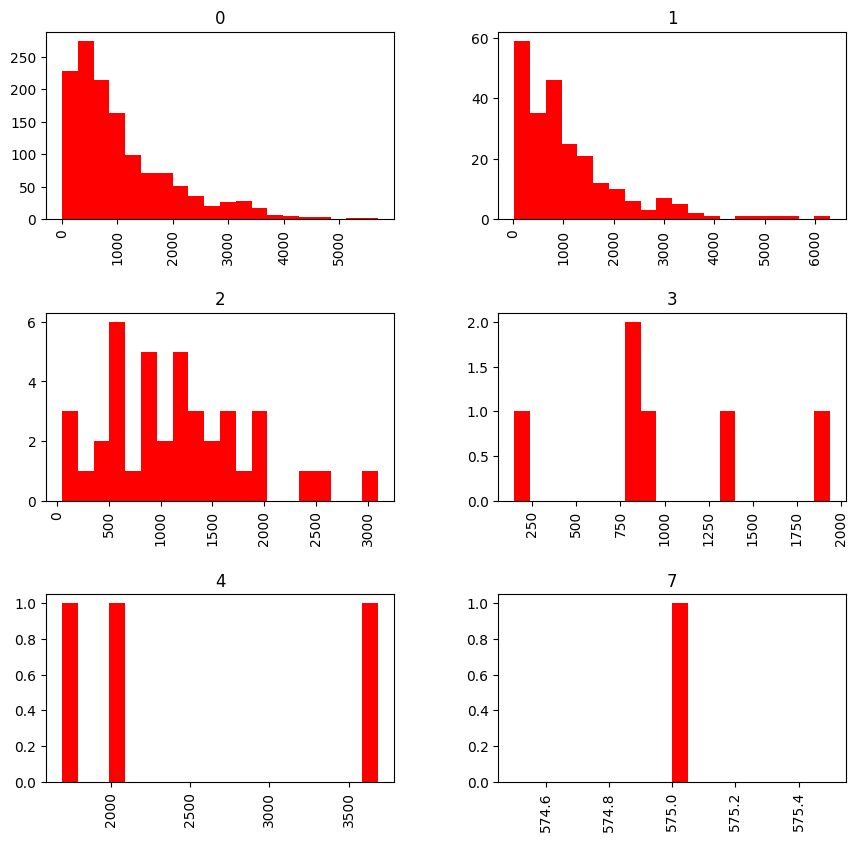

In [23]:
# create histogram for post_message_length and count_of_likes
discussions_data.hist(column = 'post_message_length', by = 'count_of_likes', figsize = (10, 10), color = 'red', bins = 20)


# find correlation between post_message_length and count_of_likes
corr = discussions_data['post_message_length'].corr(discussions_data['count_of_likes'])
print(corr)

avg_message_len = discussions_data.groupby('count_of_likes')['post_message_length'].mean()
display(avg_message_len)

In [14]:
# 

## **Conclusion**

idk